In [162]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [163]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [164]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [165]:
# create engine to hawaii.sqlite
# See 10.3 video and notes for 10.3 section 1


engine = create_engine("sqlite:///Resources/hawaii.sqlite")




In [166]:
#engine


In [167]:
# See 10.3 video and notes for 10.3 section 1


# reflect an existing database into a new model

Base = automap_base()


# reflect the tables

Base.prepare(engine, reflect=True)

C:\Users\evanm\AppData\Local\Temp\ipykernel_41608\2033113848.py:11: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [168]:
# View all of the classes that automap found
# See 10.3 video and notes for 10.3 section 1


Base.classes.keys()


['measurement', 'station']

In [169]:
# Save references to each table
# See 10.3 video and notes for 10.3 section 1


Measurement = Base.classes.measurement


Station = Base.classes.station

In [170]:
# Create our session (link) from Python to the DB
# See 10.3 video and notes for 10.3 section 1



session = Session(engine)




# Exploratory Precipitation Analysis

In [172]:
# Find the most recent date in the data set.
# See 10.3 video and notes for 10.3 section 2



most_recent_date = (session.query(Measurement.date).order_by(Measurement.date.desc()).first())


most_recent_date

('2017-08-23',)

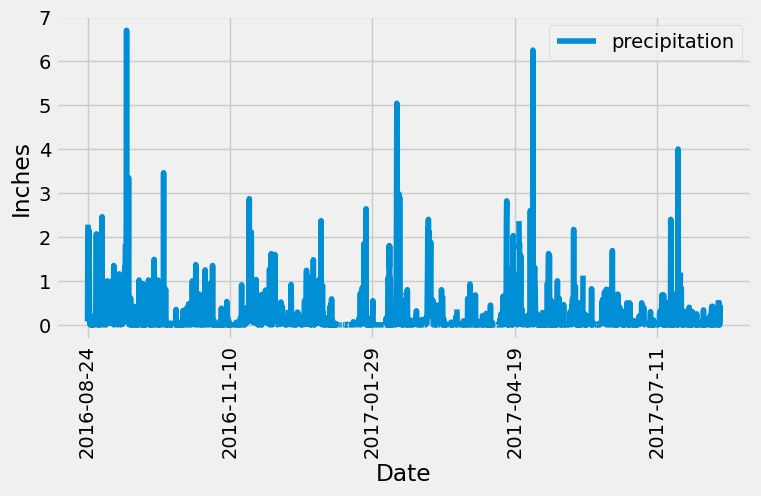

In [173]:
# See 10.3 video and notes for 10.3 section 2


# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 



# Calculate the date one year from the last date in data set.


most_recent_date = dt.datetime.strptime(last_date, "%Y-%m-%d")


one_year_ago = most_recent_date - dt.timedelta(days=365)


#print(one_year_ago)

# Date one year ago from most_recent_date

query_var = one_year_ago.strftime("%Y-%m-%d")

#print(query_var)

# Perform a query to retrieve the data and precipitation scores (I'm assuming this was supposed to say "date" instead of data.)
# Save the query results as a Pandas DataFrame. Explicitly set the column names

#https://stackoverflow.com/questions/66288069/query-for-same-date-different-years-sqalchemy

last_year_precip = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date > query_var).\
            order_by(Measurement.date).all()

#last_year_precip


# Sort the dataframe by date

# https://www.programiz.com/python-programming/methods/list/sort

sort_df_date = pd.DataFrame(last_year_precip, columns = ["Date","precipitation"])
sort_df_date.sort_values(by = "Date")
sort_df_date.set_index("Date", inplace = True)
sort_df_date.head(10)

# Use Pandas Plotting with Matplotlib to plot the data

# See Python Bar graph notes

sort_df_date.plot(figsize=(8,4))
plt.xticks( rotation = 90)
plt.ylabel("Inches")
plt.show()




In [174]:
# Use Pandas to calculate the summary statistics for the precipitation data

sort_df_date.describe()


,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [175]:
# Design a query to calculate the total number of stations in the dataset

# See 10.3 video and notes for 10.3 section 2

locations = session.query(Measurement).group_by(Measurement.station).count()

locations


9

In [176]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

# See 10.3 video and notes for 10.3 section 3-4

rows = [Measurement.station, 
       func.count(Measurement.date)]
most_active = session.query(*rows).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.date).desc()).all()

most_active 


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [179]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
 
    
# Define tobs: is a phenomenon concerning the time of day at which measurements are taken, whereby
#some maximum or minimum temperatures are not recorded; instead, a faulty, but always high
#(for maxima) or low (for minima), value is recorded from the ‘detritus’ of a more extreme value
#the previous day

# See 10.3 video and notes for 10.3 section 3-4

rows = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs),
       func.avg(Measurement.tobs)]
station_temp = session.query(*rows).\
        filter(Measurement.station == "USC00519281").\
        group_by(Measurement.station)
for station in station_temp:
    print(station)


(54.0, 85.0, 71.66378066378067)


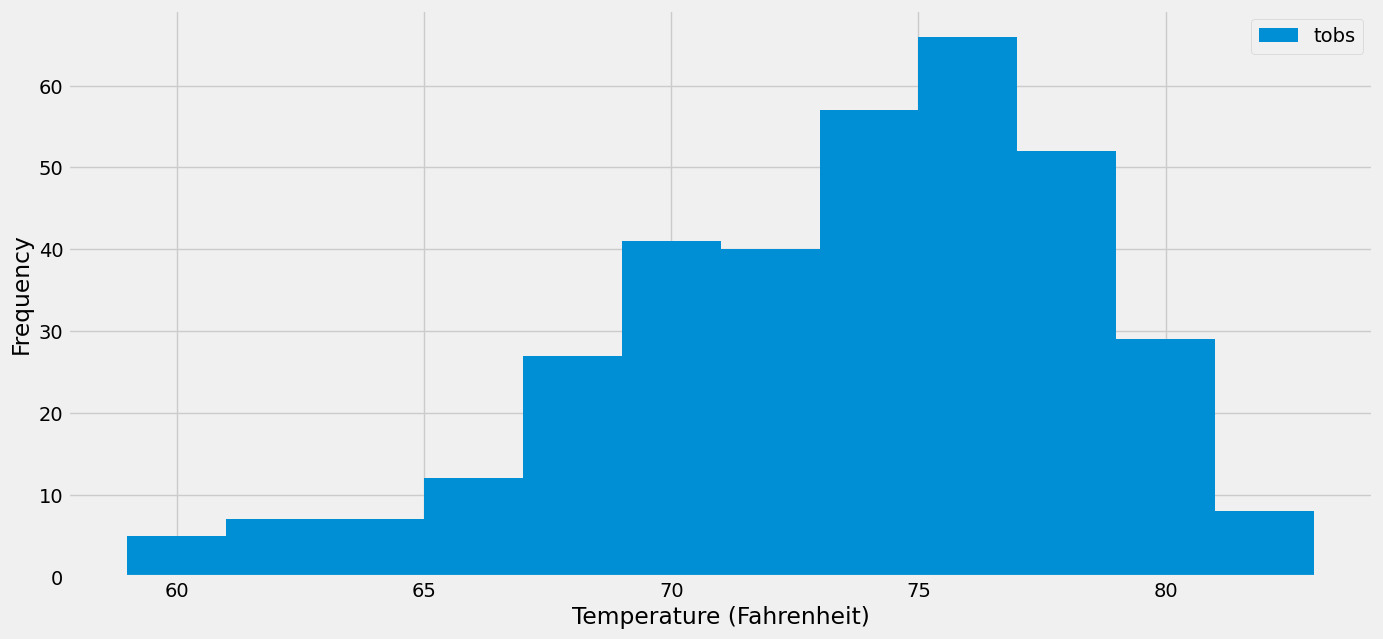

In [178]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# See 10.3 video and notes for 10.3 section 3-4 and the instructuins for this specific question



rows = [Measurement.date, 
       Measurement.tobs]
temp_obs = session.query(*rows).\
        filter(func.strftime(Measurement.date) > one_year_ago, Measurement.station == "USC00519281").\
        group_by(Measurement.date).\
        order_by(Measurement.date).all()
stations_df = pd.DataFrame(temp_obs, columns=["Date", "Temperature"])

#stations_df.head(10)

#***********



plt.hist(stations_df["Temperature"],bins = 12, density = False, label = "tobs")
plt.xlabel("Temperature (Fahrenheit)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Close Session

In [161]:
# Close Session
session.close()